In [5]:
from space import Space

state_space = Space((3, 2))

for state in state_space:
  print(state)

(0, 1)
(1, 0)
(1, 1)
(2, 0)
(2, 1)


## Policy Iteration

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
from space import Space

index = 1
with open(f'policies/value_function_{index}.json') as json_file:
    value_function = json.load(json_file)
with open(f'policies/policy_{index}.json') as json_file:
    policy = json.load(json_file)
    
height = '40'    

actions = ('0', '1')
policy_values = np.zeros((120, 60))
for state in value_function:
    
    state_player_height, state_pipe_height, state_distance = state.split(',')
    if state_pipe_height.strip() != height:
        continue
    
    
    i = int(state_player_height.strip()[1:])
    j = int(state_distance.strip()[:-1])
    policy_values[i, j] = int(policy[state])
    
state_values = np.zeros((120, 60))
for i in range(120):
    for j in range(60):
        state = f"({i}, {height}, {j})"
        state_values[i, j] = value_function[state]

In [10]:
print(value_function['(40, 40, 30)'], value_function['(50, 40, 30)'], value_function['(75, 40, 30)'])

406.89999999999986 406.89999999999986 406.89999999999986


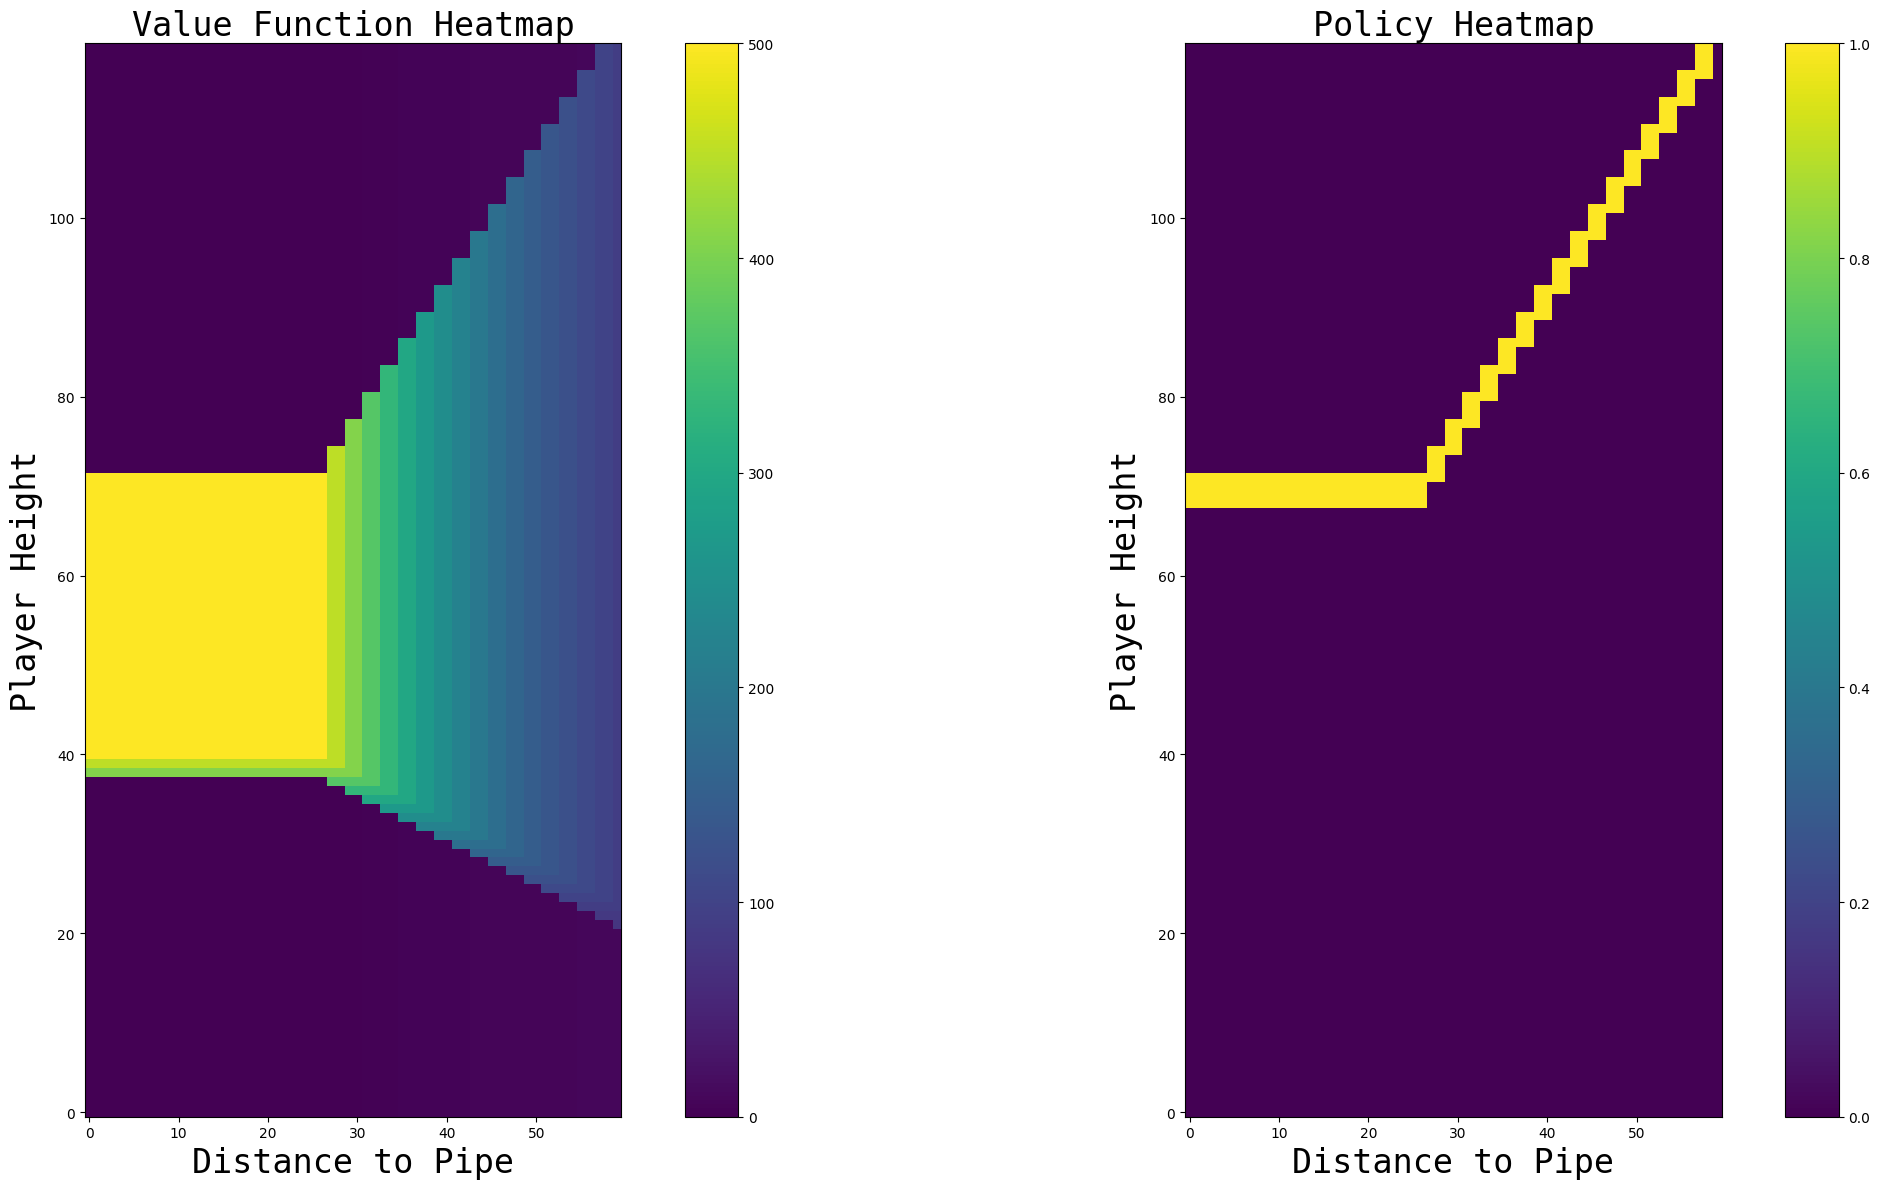

In [2]:
fig = plt.figure()
fig.set_size_inches(24, 12)

ax1 = fig.add_subplot(121)
ax1.set_title("Value Function Heatmap", font="monospace", fontsize=24)
ax1.set_xlabel("Distance to Pipe", font="monospace", fontsize=24)
ax1.set_ylabel("Player Height", font="monospace", fontsize=24)
im1 = ax1.imshow(state_values, origin="lower")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
ax2.set_title("Policy Heatmap", font="monospace", fontsize=24)
ax2.set_xlabel("Distance to Pipe", font="monospace", fontsize=24)
ax2.set_ylabel("Player Height", font="monospace", fontsize=24)
im2 = ax2.imshow(policy_values, origin="lower")
fig.colorbar(im2)

fig.tight_layout()

plt.savefig("reward_function3.png")

# plt.show()

In [99]:
state = (97, 9, 50)
next_state = (98, 9, 48)

print(policy[str(state)], value_function[str(state)])
print(policy[str(next_state)], value_function[str(next_state)])

player_height = state[0] * 8
pipe1_height = (state[1] * 4) + 150
pipe2_height = pipe1_height + 300
pipe_distance = state[2] * 8

print(player_height, pipe1_height, pipe2_height, 40 - (0.5 * (pipe1_height + 10 - player_height)), 40 - (0.5 * (player_height + 80 - pipe2_height)))

1 103.54929132416768
1 75.71824940481733
776 186 486 330.0 -145.0


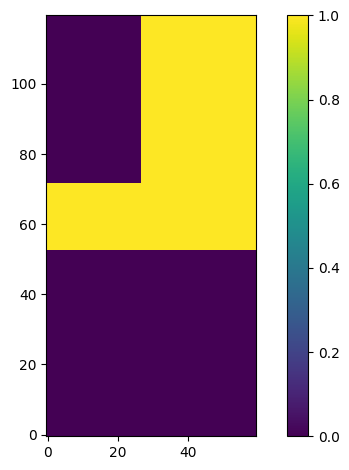

In [240]:
height = '40'
actions = ('0', '1')
values = np.zeros((120, 60))

for state in value_function:
    
    state_player_height, state_pipe_height, state_distance = state.split(',')
    if state_pipe_height.strip() != height:
        continue
    
    i = int(state_player_height.strip()[1:])
    j = int(state_distance.strip()[:-1])
    values[i, j] = policy[state]

fig, ax = plt.subplots()
im = ax.imshow(values, origin="lower")

fig.colorbar(im)

fig.tight_layout()
plt.show()

## SARSA

In [26]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import json
import sys
from space import Space

def get_value_function_values(height: str, value_function):
    actions = ('0', '1')
    values = np.zeros((120, 80))
    
    for state in value_function:
        
        state_player_height, state_pipe_height, state_distance = state.split(',')
        if state_pipe_height.strip() != height:
            continue
        
        max_value = -sys.maxsize
        for action in actions:
            max_value = max(max_value, value_function[state][action])

        if max_value == 0:
            max_value = -100
        # max_value = min(max_value, 100)
        
        i = int(state_player_height.strip()[1:])
        j = int(state_distance.strip()[:-1])
        values[i, j] = max_value

    return values

def get_visited_states(height: str, value_function):
    actions = ('0', '1')
    values = np.zeros((120, 80))
    
    for state in value_function:

        state_player_height, state_pipe_height, state_distance = state.split(',')
        if state_pipe_height.strip() != height:
            continue
        
        value = 0 if value_function[state]['0'] + value_function[state]['1'] == 0 else 1

        state_player_height, state_pipe_height, state_distance = state.split(',')
        i = int(state_player_height.strip()[1:])
        j = int(state_distance.strip()[:-1])
        values[i, j] = value

    return values

def get_policy_values(height: str, value_function):
    actions = ('0', '1')
    values = np.zeros((120, 80))
    
    for state in value_function:
        
        state_player_height, state_pipe_height, state_distance = state.split(',')
        if state_pipe_height.strip() != height:
            continue
        
        i = int(state_player_height.strip()[1:])
        j = int(state_distance.strip()[:-1])
        if value_function[state]['0'] > value_function[state]['1']:
            values[i, j] = 0
        else:
            values[i, j] = 1

    return values

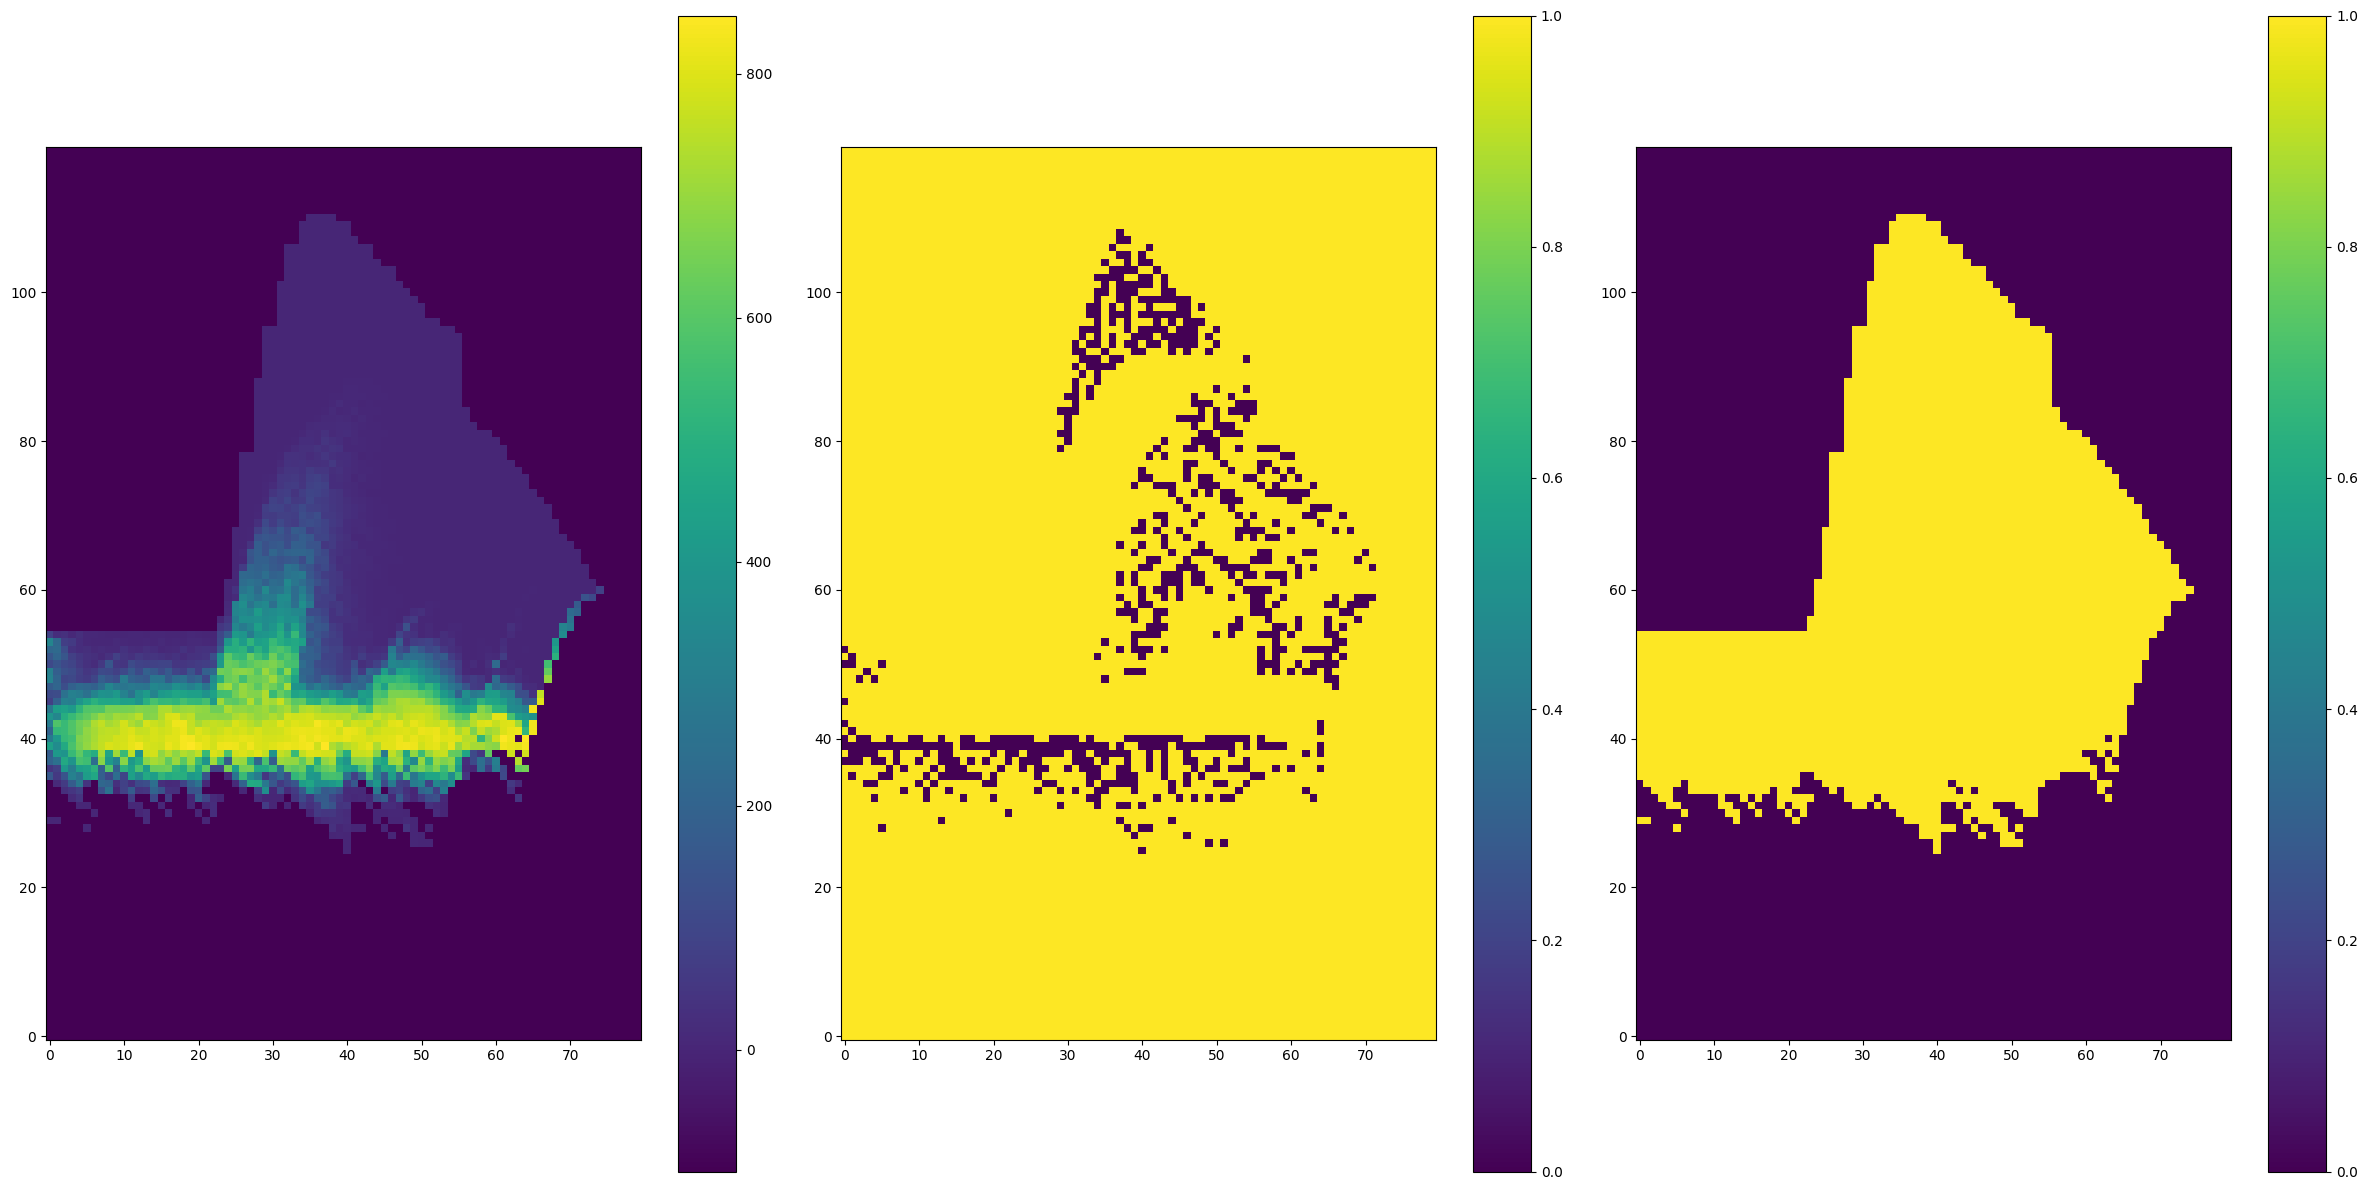

In [3]:
index = 500
with open(f"td_sarsa_functions3/action_value_function_{index}.json") as json_file:
    value_function = json.load(json_file)

pipe_height = '8'
value_function_values = get_value_function_values(pipe_height, value_function)
policy_values = get_policy_values(pipe_height, value_function)
visited_states = get_visited_states(pipe_height, value_function)

fig = plt.figure()
fig.set_size_inches(24, 12)

ax1 = fig.add_subplot(131)
im1 = ax1.imshow(value_function_values, origin="lower")
fig.colorbar(im1)

ax2 = fig.add_subplot(132)
im2 = ax2.imshow(policy_values, origin="lower")
fig.colorbar(im2)

ax3 = fig.add_subplot(133)
im3 = ax3.imshow(visited_states, origin="lower")
fig.colorbar(im3)

fig.tight_layout()
plt.show()

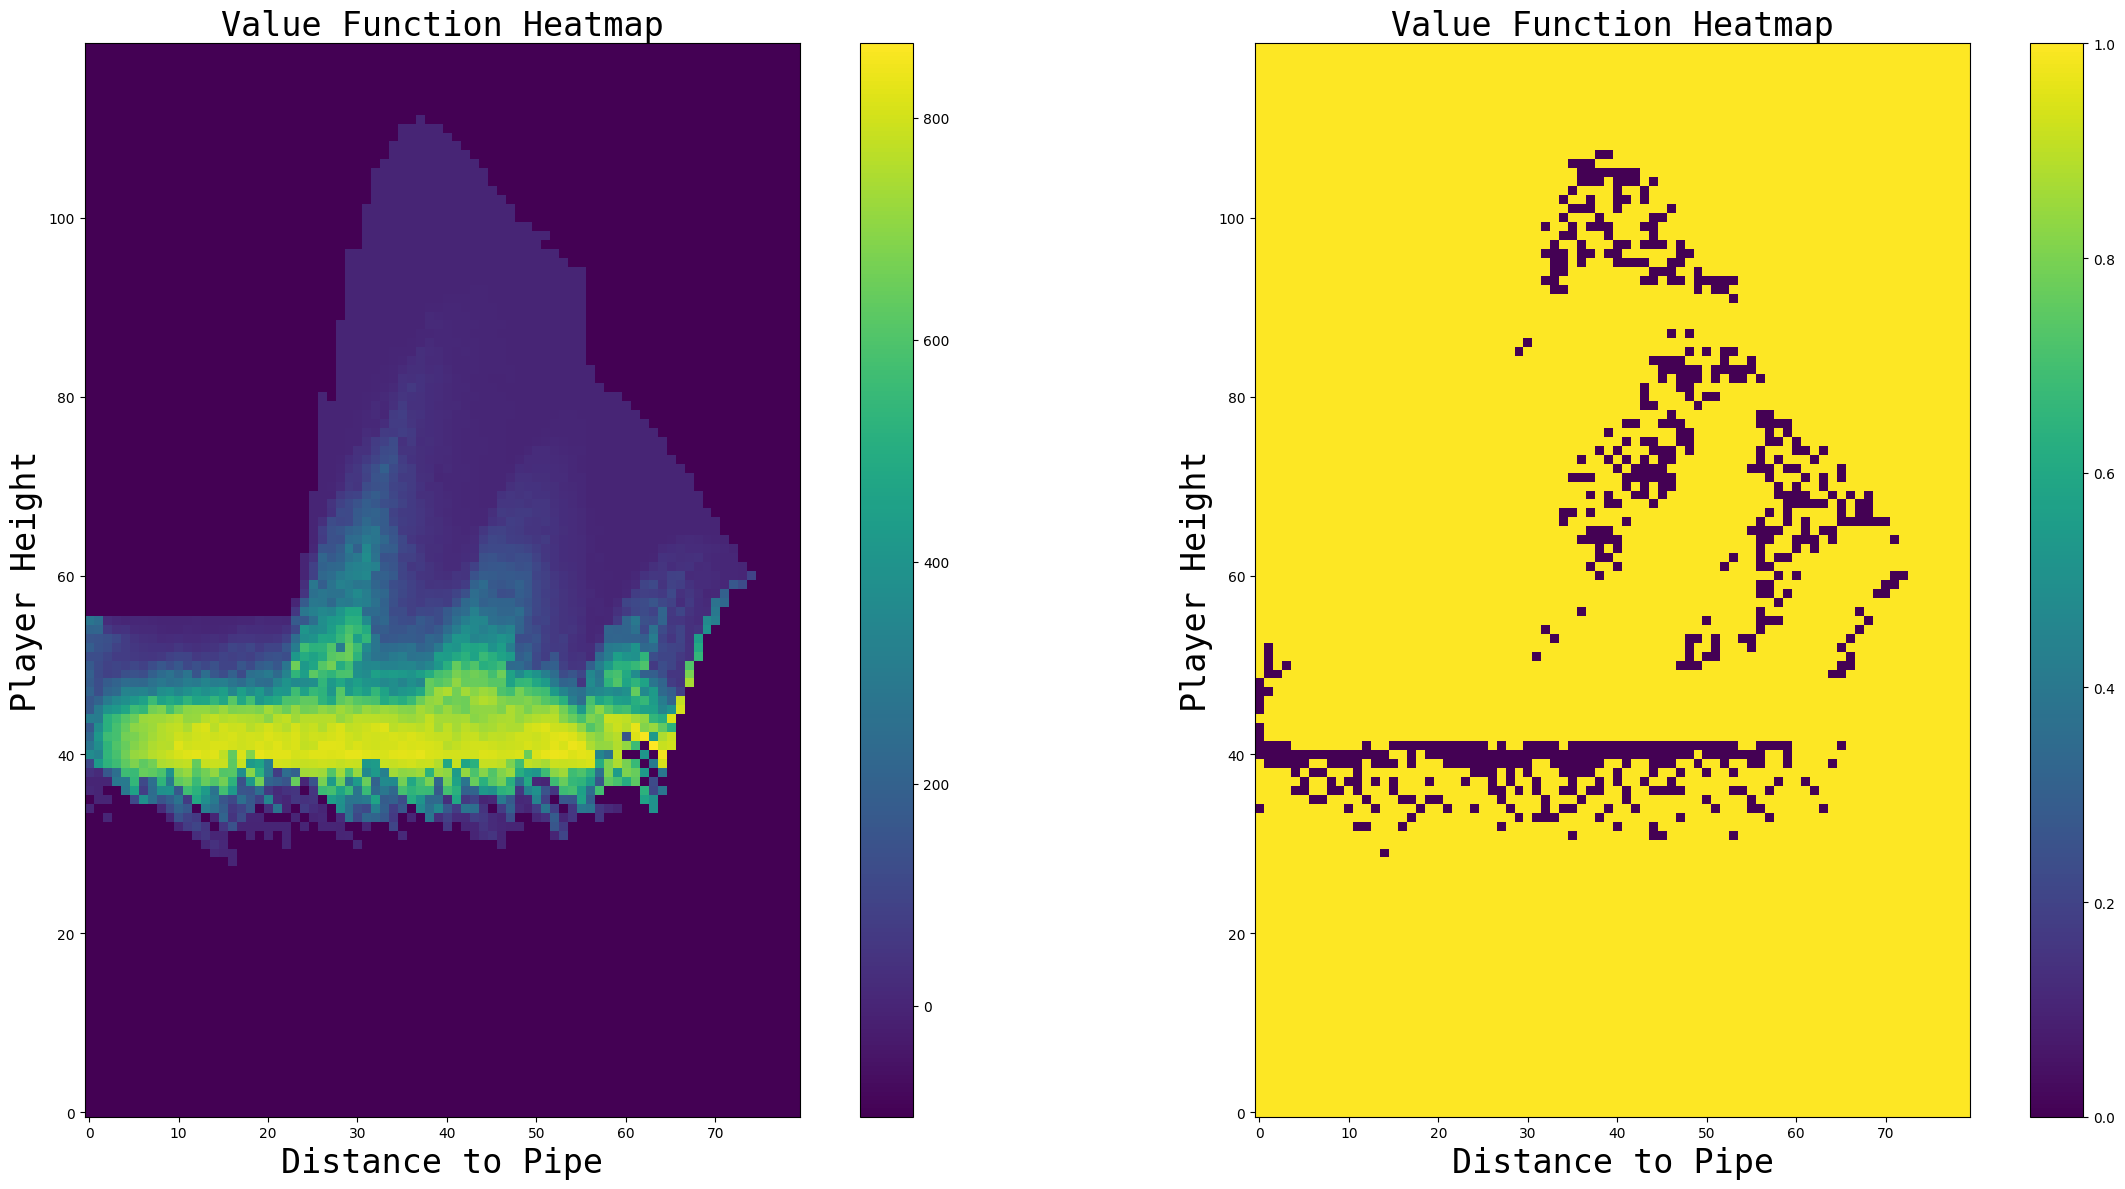

In [28]:
index = 1800
with open(f"td_sarsa_functions3/action_value_function_{index}.json") as json_file:
    value_function = json.load(json_file)

pipe_height = '10'
value_function_values = get_value_function_values(pipe_height, value_function)
policy_values = get_policy_values(pipe_height, value_function)
visited_states = get_visited_states(pipe_height, value_function)

fig = plt.figure()
fig.set_size_inches(24, 12)

ax1 = fig.add_subplot(121)
ax1.set_title("Value Function Heatmap", font="monospace", fontsize=24)
ax1.set_xlabel("Distance to Pipe", font="monospace", fontsize=24)
ax1.set_ylabel("Player Height", font="monospace", fontsize=24)
im1 = ax1.imshow(value_function_values, origin="lower")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
ax2.set_title("Value Function Heatmap", font="monospace", fontsize=24)
ax2.set_xlabel("Distance to Pipe", font="monospace", fontsize=24)
ax2.set_ylabel("Player Height", font="monospace", fontsize=24)
im2 = ax2.imshow(policy_values, origin="lower")
fig.colorbar(im2)

fig.tight_layout()
plt.savefig("sarsa2_heatmap.png")
plt.show()

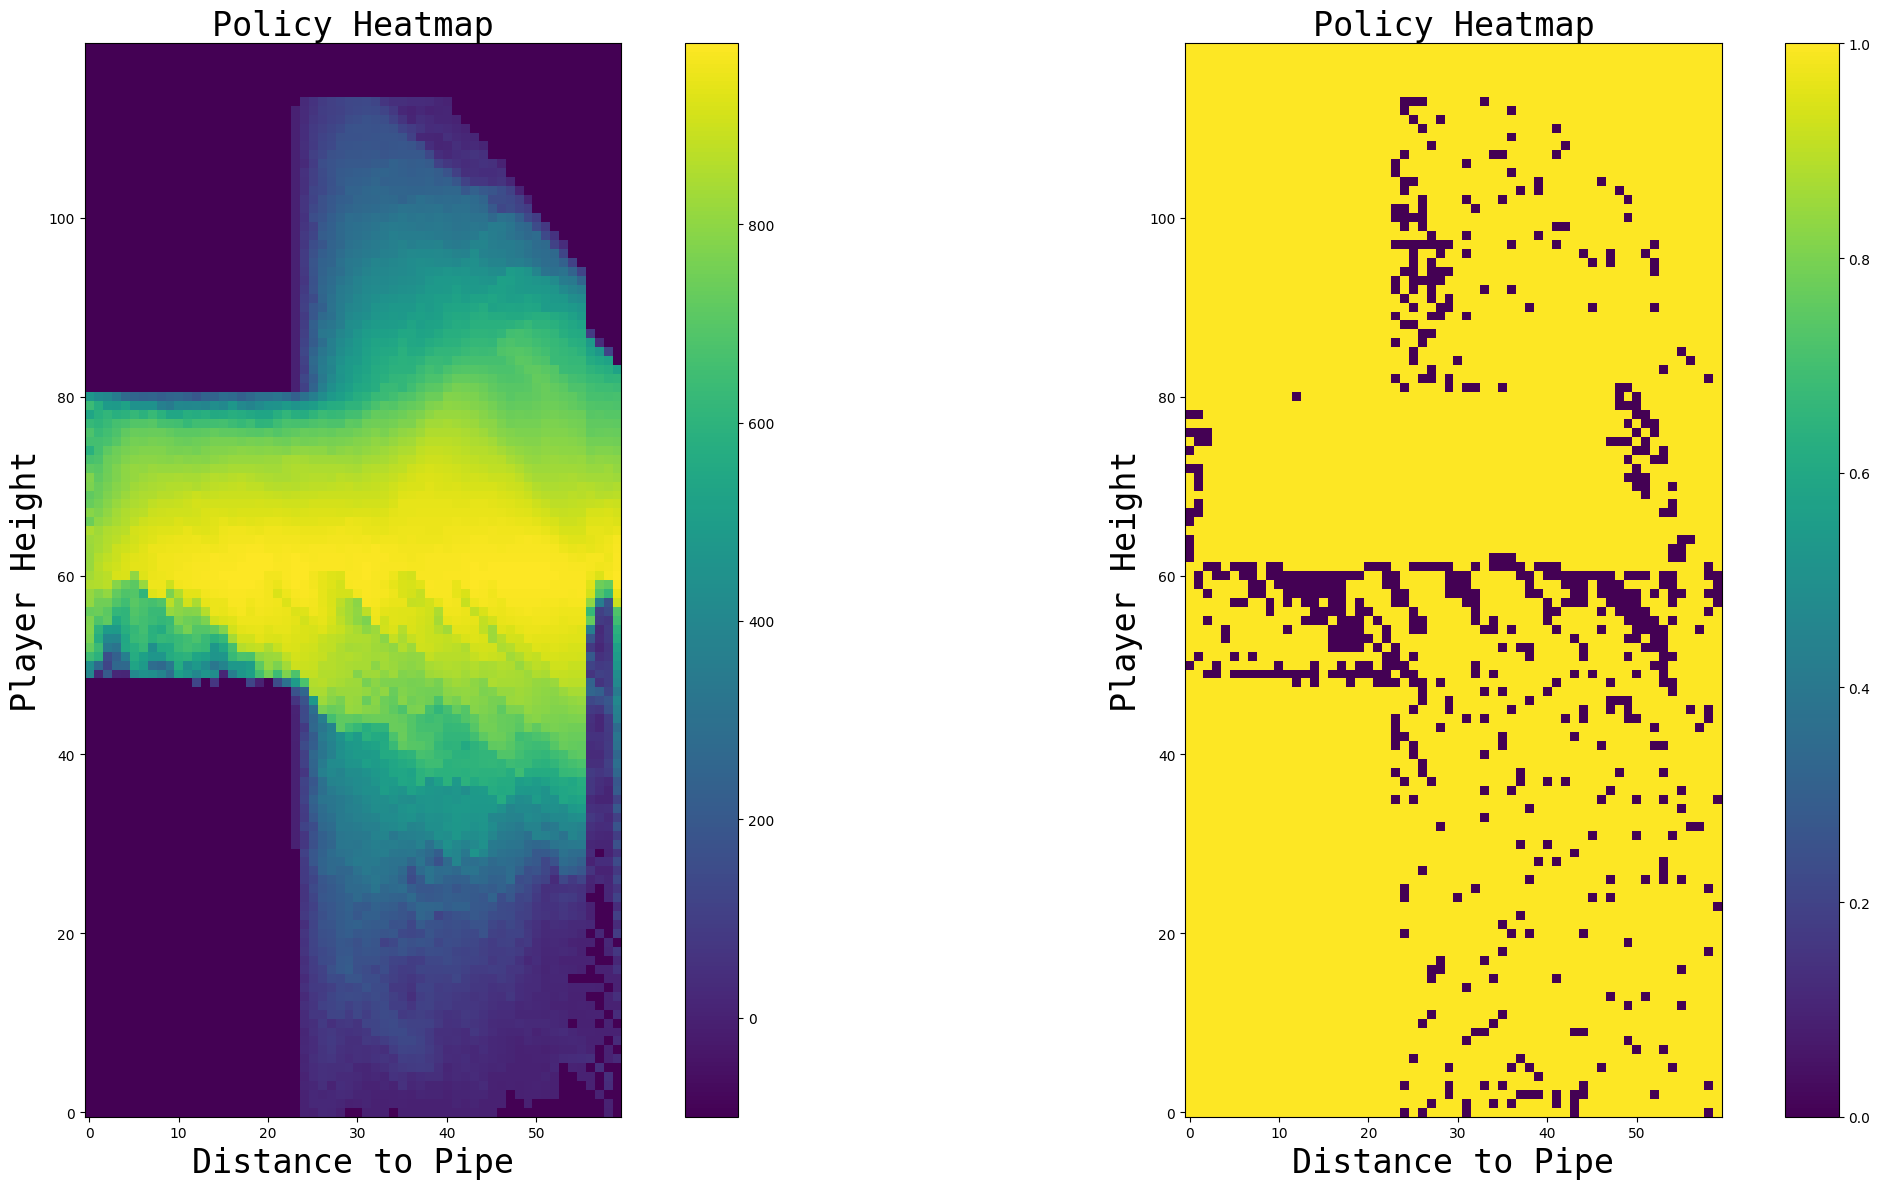

In [25]:
index = 1800
with open(f"td_sarsa_functions/action_value_function_{index}.json") as json_file:
  value_function = json.load(json_file)

pipe_height = '60'
value_function_values = get_value_function_values(pipe_height, value_function)
policy_values = get_policy_values(pipe_height, value_function)
visited_states = get_visited_states(pipe_height, value_function)

fig = plt.figure()
fig.set_size_inches(24, 12)

ax1 = fig.add_subplot(121)
ax1.set_title("Policy Heatmap", font="monospace", fontsize=24)
ax1.set_xlabel("Distance to Pipe", font="monospace", fontsize=24)
ax1.set_ylabel("Player Height", font="monospace", fontsize=24)
im1 = ax1.imshow(value_function_values, origin="lower")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
ax2.set_title("Policy Heatmap", font="monospace", fontsize=24)
ax2.set_xlabel("Distance to Pipe", font="monospace", fontsize=24)
ax2.set_ylabel("Player Height", font="monospace", fontsize=24)
im2 = ax2.imshow(policy_values, origin="lower")
fig.colorbar(im2)

fig.tight_layout()

plt.savefig("sarsa1_heatmap.png")

plt.show()

In [146]:
baseline_value_function = {}

height_range = 90
player_height_range = 120
player_distance_range = 60

for height in range(height_range):

    baseline_value = 0
    for player_height in range(player_height_range):
        for player_distance in range(player_distance_range):
            
            state = f"({player_height}, {height}, {player_distance})"
            if state == "(0, 0, 0)":
                continue
            
            baseline_value += value_function[state]['0']
            baseline_value += value_function[state]['1']

    baseline_value /= (player_height_range * player_distance_range * 2)

    for player_height in range(player_height_range):
        for player_distance in range(player_distance_range):
            
            state = f"({player_height}, {height}, {player_distance})"
            baseline_value_function[state] = {'0': baseline_value, '1': baseline_value}

with open(f"action_value_functions/baseline_value_function.json", "w") as file:
        json.dump(baseline_value_function, file)

In [14]:
from td_sarsa import TdSarsa
from time import perf_counter

action_value_indices = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 
                          900, 1000, 1100, 1200, 1300, 1400, 1500, 1600,
                          1700, 1800]

for index in action_value_indices:
    START_TIME = perf_counter()
    starting_action_value_function_path = f"td_sarsa_functions3/action_value_function_{index}.json"
    print(f"Playing with action value function # {index}")
    
    model = TdSarsa(starting_action_value_function_path, use_starting_value_function=True, n_steps=5, alpha=0.1, gamma=0.9, epsilon=0)
    model.play_with_statistics(f"td_sarsa_statistics3/action_value_function_{index}", max_frame_count=10000000)

    print(perf_counter() - START_TIME)

Playing with action value function # 1
3050.787513300078
Playing with action value function # 10
3158.7747990998905
Playing with action value function # 100
3155.550583299948
Playing with action value function # 200
3012.5939170001075
Playing with action value function # 300
3150.473817799939
Playing with action value function # 400
3021.713427499868
Playing with action value function # 500
3020.007605199935
Playing with action value function # 600
3160.181376799941
Playing with action value function # 700
3158.467191200005
Playing with action value function # 800
3166.9416948000435
Playing with action value function # 900
3167.712190499995
Playing with action value function # 1000
3156.409322499996
Playing with action value function # 1100
3035.3803005001973
Playing with action value function # 1200
3025.02778559993
Playing with action value function # 1300
3020.792803300079
Playing with action value function # 1400
3243.2963348000776
Playing with action value function # 1500
3187.739

In [47]:
import statistics

action_value_indices = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 
                          900, 1000, 1100, 1200, 1300, 1400, 1500, 1600,
                          1700, 1800]

for index in action_value_indices:
    action_value_function_path = f"td_sarsa_statistics/action_value_function_{index}/scores.txt"

    with open(action_value_function_path, "r") as file:
        scores = file.read()[1:-1].split(", ")
        for score_index, score in enumerate(scores):
            scores[score_index] = int(score)
        scores = np.array(scores)
        
        quartiles = percentile(scores, [25, 50, 75])
        data_min, data_max = scores.min(), scores.max()
        print(index, statistics.mean(scores), 'Min: %.3f' % data_min, 'Q1: %.3f' % quartiles[0], 'Median: %.3f' % quartiles[1], 'Q3: %.3f' % quartiles[2], 'Max: %.3f' % data_max)

1 0 Min: 0.000 Q1: 0.000 Median: 0.000 Q3: 0.000 Max: 3.000
10 0 Min: 0.000 Q1: 0.000 Median: 0.000 Q3: 0.000 Max: 4.000
100 0 Min: 0.000 Q1: 0.000 Median: 0.000 Q3: 1.000 Max: 5.000
200 0 Min: 0.000 Q1: 0.000 Median: 0.000 Q3: 1.000 Max: 7.000
300 1 Min: 0.000 Q1: 0.000 Median: 1.000 Q3: 2.000 Max: 12.000
400 2 Min: 0.000 Q1: 1.000 Median: 2.000 Q3: 3.000 Max: 22.000
500 2 Min: 0.000 Q1: 1.000 Median: 2.000 Q3: 4.000 Max: 28.000
600 4 Min: 0.000 Q1: 1.000 Median: 3.000 Q3: 6.000 Max: 42.000
700 7 Min: 0.000 Q1: 2.000 Median: 5.000 Q3: 11.000 Max: 65.000
800 7 Min: 0.000 Q1: 2.000 Median: 5.000 Q3: 10.000 Max: 61.000
900 17 Min: 0.000 Q1: 5.000 Median: 13.000 Q3: 24.000 Max: 196.000
1000 20 Min: 1.000 Q1: 6.000 Median: 14.000 Q3: 27.000 Max: 176.000
1100 18 Min: 0.000 Q1: 5.000 Median: 13.000 Q3: 26.000 Max: 156.000
1200 21 Min: 1.000 Q1: 7.000 Median: 14.000 Q3: 29.000 Max: 133.000
1300 21 Min: 1.000 Q1: 6.000 Median: 15.000 Q3: 29.000 Max: 197.000
1400 17 Min: 0.000 Q1: 5.000 Median:

1 0 Min: 0.000 Q1: 0.000 Median: 0.000 Q3: 0.000 Max: 3.000
10 1 Min: 0.000 Q1: 1.000 Median: 1.000 Q3: 2.000 Max: 11.000
100 3 Min: 1.000 Q1: 1.000 Median: 3.000 Q3: 5.000 Max: 31.000
200 6 Min: 1.000 Q1: 2.000 Median: 5.000 Q3: 8.000 Max: 51.000
300 17 Min: 1.000 Q1: 5.000 Median: 12.000 Q3: 24.000 Max: 178.000
400 39 Min: 1.000 Q1: 12.250 Median: 28.000 Q3: 55.000 Max: 218.000
500 28 Min: 1.000 Q1: 8.000 Median: 20.000 Q3: 40.000 Max: 235.000
600 35 Min: 1.000 Q1: 10.000 Median: 24.000 Q3: 49.000 Max: 397.000
700 41 Min: 1.000 Q1: 12.000 Median: 29.000 Q3: 58.000 Max: 249.000
800 59 Min: 1.000 Q1: 17.000 Median: 42.000 Q3: 83.000 Max: 377.000
900 48 Min: 1.000 Q1: 15.000 Median: 36.000 Q3: 68.000 Max: 387.000
1000 50 Min: 1.000 Q1: 14.000 Median: 36.000 Q3: 69.000 Max: 337.000
1100 55 Min: 1.000 Q1: 16.000 Median: 38.000 Q3: 76.000 Max: 368.000
1200 49 Min: 1.000 Q1: 13.000 Median: 37.000 Q3: 68.000 Max: 345.000
1300 65 Min: 1.000 Q1: 21.000 Median: 47.000 Q3: 87.000 Max: 475.000
14

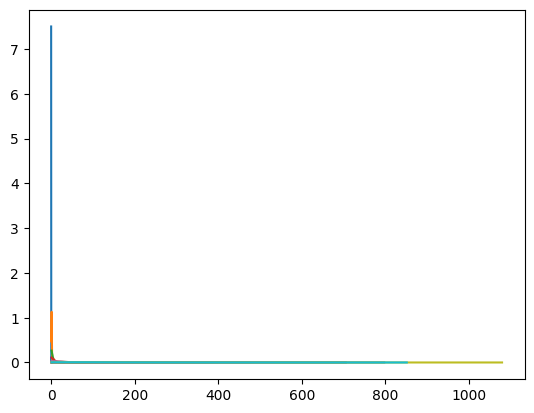

In [44]:
import matplotlib.pyplot as plt
import scipy.stats as stats
from numpy import percentile

plot_values = []

for index in action_value_indices:
    action_value_function_path = f"td_sarsa_statistics3/action_value_function_{index}/scores.txt"
    
    with open(action_value_function_path, "r") as file:
        scores = file.read()[1:-1].split(", ")
        for score_index, score in enumerate(scores):
            scores[score_index] = int(score)
        scores = np.array(scores)
        
        # print(index, len(scores), statistics.mean(scores), statistics.variance(scores))
        quartiles = percentile(scores, [25, 50, 75])
        data_min, data_max = scores.min(), scores.max()
        print(index, statistics.mean(scores), 'Min: %.3f' % data_min, 'Q1: %.3f' % quartiles[0], 'Median: %.3f' % quartiles[1], 'Q3: %.3f' % quartiles[2], 'Max: %.3f' % data_max)

    n, x, _, = plt.hist(scores, histtype=u'step', density=True)
    plt.clf()

    density = stats.gaussian_kde(scores)
    plot_values.append((x, density(x)))

for x, density in plot_values:
    plt.plot(x, density)

plt.show()

<Figure size 2000x1600 with 0 Axes>

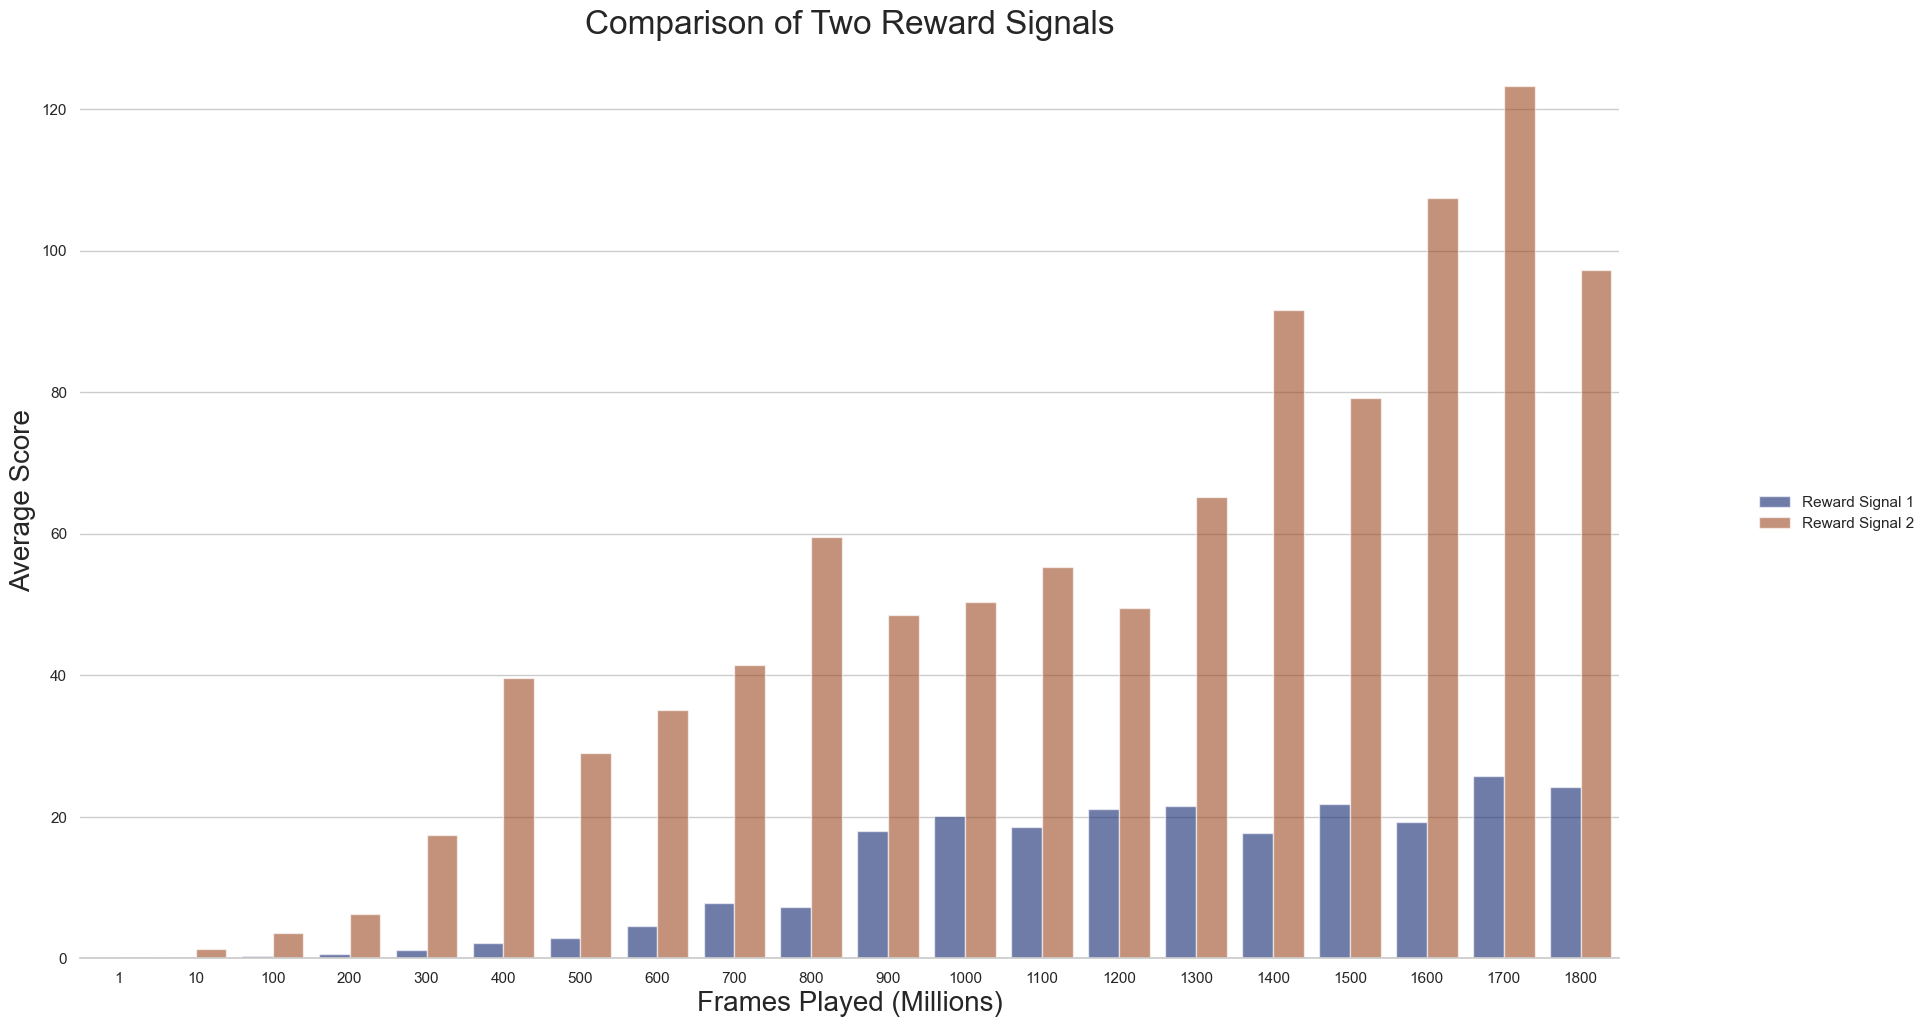

In [130]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def read_scores(path: str):
    with open(action_value_function_path, "r") as file:
        scores = file.read()[1:-1].split(", ")
        for score_index, score in enumerate(scores):
            scores[score_index] = int(score)
        scores = np.array(scores)

    return scores

action_value_indices = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 
                          900, 1000, 1100, 1200, 1300, 1400, 1500, 1600,
                          1700, 1800]

# gather average scores for each reward signal
average_scores = {}
for index in action_value_indices:
    action_value_function_path = f"td_sarsa_statistics/action_value_function_{index}/scores.txt"
    scores = read_scores(action_value_function_path)

    average_scores[index] = [np.mean(scores)]

for index in action_value_indices:
    action_value_function_path = f"td_sarsa_statistics3/action_value_function_{index}/scores.txt"
    scores = read_scores(action_value_function_path)

    average_scores[index].append(np.mean(scores))

average_scores = pd.DataFrame.from_dict(average_scores, orient='index')

# Reformat dataframe
average_scores = average_scores.stack().to_frame('avg. score').reset_index()
average_scores.rename(columns={'level_0': 'Frames Played (Millions)'},inplace=True)
average_scores.rename(columns={'level_1': 'Reward Signal'},inplace=True)
average_scores["Reward Signal"] = average_scores["Reward Signal"].map({0: "Reward Signal 1", 1 : "Reward Signal 2"})

# Plot double bar chart
g = sns.catplot(
    data=average_scores, kind="bar",
    x="Frames Played (Millions)", y="avg. score", hue="Reward Signal",
    errorbar="sd", palette="dark", alpha=.6, height=10
)

g.figure.set_size_inches((20, 10))

g.despine(left=True)
g.legend.set_title("")
g.set_xlabels("Frames Played (Millions)", fontsize=20)
g.set_ylabels("Average Score", fontsize=20)

plt.title("Comparison of Two Reward Signals", fontsize=24)
# plt.savefig("sarsa_comparison.png", bbox_inches='tight')
plt.show()

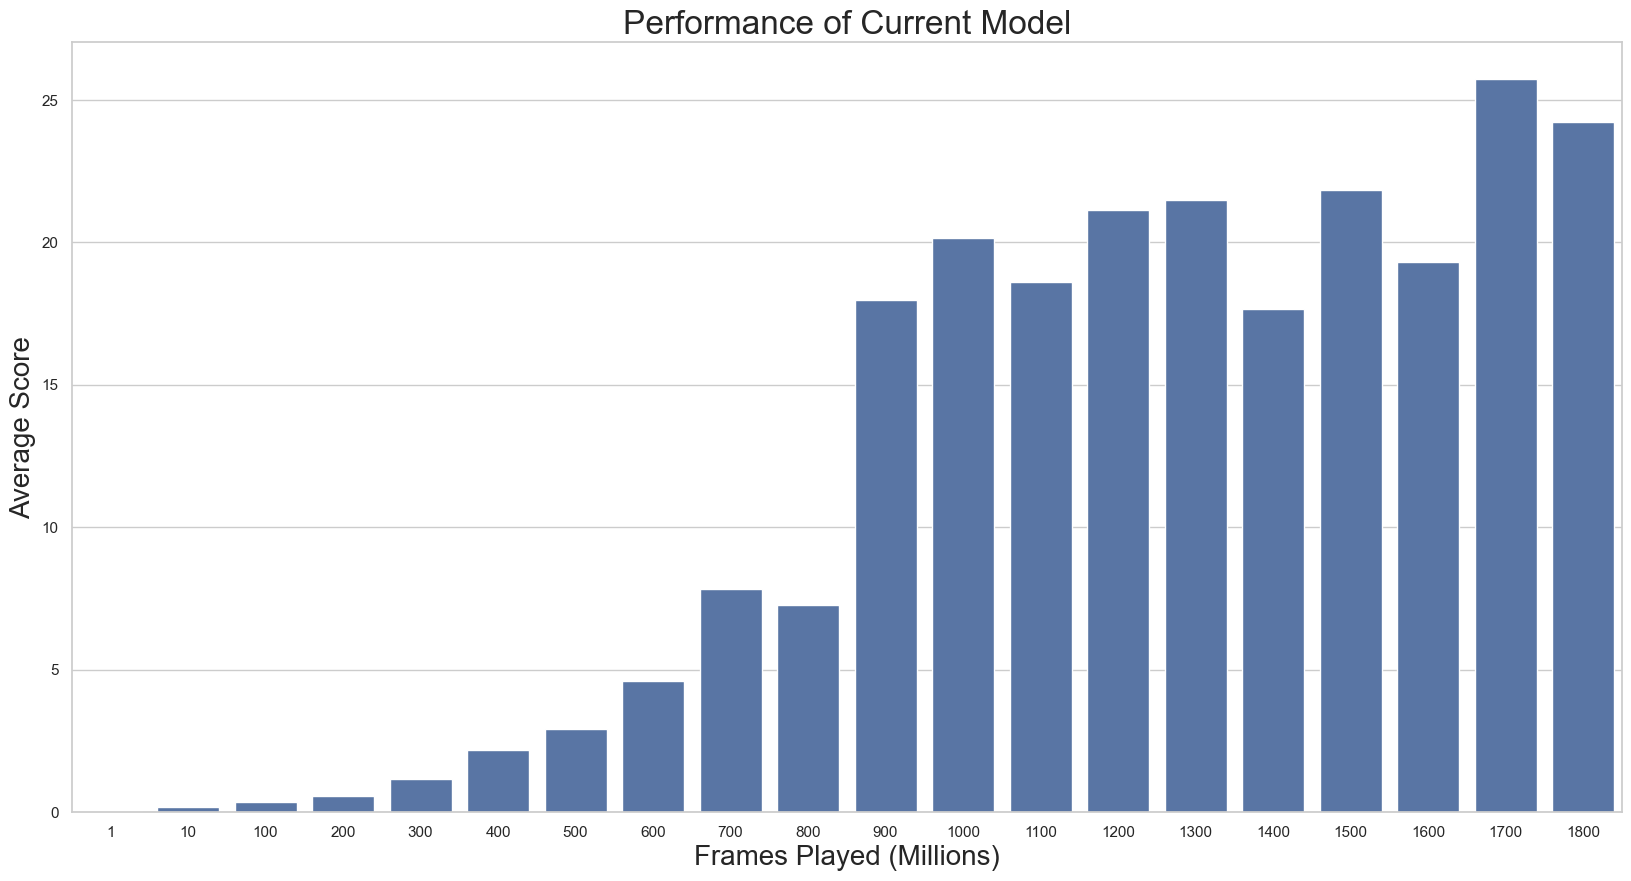

In [146]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def read_scores(path: str):
    with open(action_value_function_path, "r") as file:
        scores = file.read()[1:-1].split(", ")
        for score_index, score in enumerate(scores):
            scores[score_index] = int(score)
        scores = np.array(scores)

    return scores

action_value_indices = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 
                          900, 1000, 1100, 1200, 1300, 1400, 1500, 1600,
                          1700, 1800]

# gather average scores for each reward signal
average_scores = {}
for index in action_value_indices:
    action_value_function_path = f"td_sarsa_statistics/action_value_function_{index}/scores.txt"
    scores = read_scores(action_value_function_path)

    average_scores[index] = [np.mean(scores)]

average_scores = pd.DataFrame.from_dict(average_scores, orient='index')

# Reformat dataframe
average_scores = average_scores.stack().to_frame('avg. score').reset_index()
average_scores.rename(columns={'level_0': 'Frames Played (Millions)'},inplace=True)

# Plot double bar chart
g = sns.barplot(
    data=average_scores,
    x="Frames Played (Millions)", y="avg. score", hue="level_1")

g.figure.set_size_inches((20, 10))

g.set_xlabel("Frames Played (Millions)", fontsize=20)
g.set_ylabel("Average Score", fontsize=20)
g.get_legend().remove()
plt.title("Performance of Current Model", fontsize=24)
plt.savefig("sarsa_performance.png", bbox_inches='tight')
plt.show()

In [133]:
def read_scores(path: str):
    with open(action_value_function_path, "r") as file:
        scores = file.read()[1:-1].split(", ")
        for score_index, score in enumerate(scores):
            scores[score_index] = int(score)
        scores = np.array(scores)

    return scores

action_value_indices = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 
                          900, 1000, 1100, 1200, 1300, 1400, 1500, 1600,
                          1700, 1800]

# gather average scores for each reward signal
average_scores = {}
for index in action_value_indices:
    action_value_function_path = f"td_sarsa_statistics/action_value_function_{index}/scores.txt"
    scores = read_scores(action_value_function_path)

    average_scores[index] = [np.mean(scores)]

average_scores = pd.DataFrame.from_dict(average_scores, orient='index')
average_scores = average_scores.stack().to_frame('avg. score').reset_index()

average_scores

,level_0,level_1,avg. score
0,1,0,0.058461
1,10,0,0.182703
2,100,0,0.352041
3,200,0,0.586052
4,300,0,1.163759
5,400,0,2.197358
6,500,0,2.928332
7,600,0,4.611752
8,700,0,7.821717
9,800,0,7.271787


## Double Expected Sarsa

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import json
import sys

from space import Space
import matplotlib as mpl

def get_value_function_values(height: str, value_function):
    actions = ('0', '1')
    values = np.zeros((120, 60))
    
    for state in value_function:
        
        state_player_height, state_pipe_height, state_distance = state.split(',')
        if state_pipe_height.strip() != height:
            continue

        action_0 = '0'
        action_1 = '1'
        value = value_function[state][action_0] - value_function[state][action_1]
        if value > 10:
            value = 10
        elif value < -10:
            value = -10
        
        i = int(state_player_height.strip()[1:])
        j = int(state_distance.strip()[:-1])
        values[i, j] = value

    return values

def get_policy_values(height: str, value_function):
    actions = ('0', '1')
    values = np.zeros((120, 60))
    
    for state in value_function:
        
        state_player_height, state_pipe_height, state_distance = state.split(',')
        if state_pipe_height.strip() != height:
            continue
        
        i = int(state_player_height.strip()[1:])
        j = int(state_distance.strip()[:-1])
        if value_function[state]['0'] > value_function[state]['1']:
            values[i, j] = 1
        else:
            values[i, j] = 0

    return values

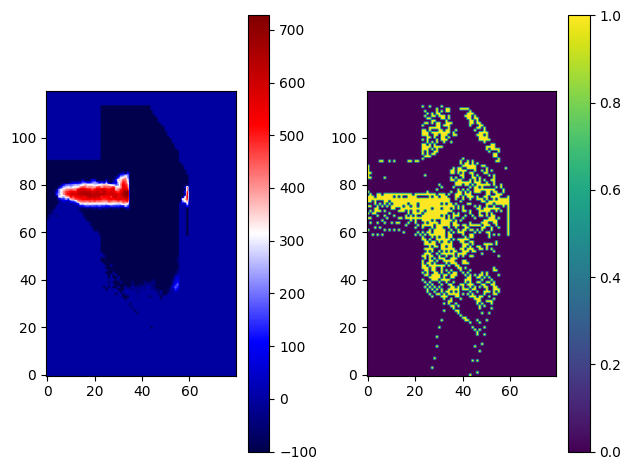

In [95]:
index = 770
with open(f"td_sarsa_functions2/action_value_function_{index}.json") as json_file:
  value_function = json.load(json_file)

height = '80'

value_function_values = get_value_function_values(height, value_function)
policy_values = get_policy_values(height, value_function)

fig = plt.figure()

ax1 = fig.add_subplot(121)
im1 = ax1.imshow(value_function_values, cmap=mpl.colormaps['seismic'] , origin="lower")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(policy_values, origin="lower")
fig.colorbar(im2)

fig.tight_layout()
plt.show()

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import json
import sys

from space import Space
import matplotlib as mpl

def get_value_function_values(height_range: int, value_function):
    actions = ('0', '1')
    values = np.zeros((960, height_range))
    
    for state in value_function:
        state_player_height, state_pipe_height = state.split(',')

        action_0 = '0'
        action_1 = '1'
        max_value = value_function[state][action_0] - value_function[state][action_1]
        
        # max_value = -sys.maxsize
        # for action in actions:
            # max_value = max(max_value, value_function[state][action])
            # max_value = -1000 if max_value == 0 else max_value
            
        i = int(state_player_height.strip()[1:])
        j = int(state_pipe_height.strip()[:-1])

        if j > (height_range - 1):
            continue
        
        values[i, j] = max_value

    return values

def get_policy_values(height_range: int, value_function):
    actions = ('0', '1')
    values = np.zeros((960, height_range))
    
    for state in value_function:
        
        state_player_height, state_pipe_height = state.split(',')

        i = int(state_player_height.strip()[1:])
        j = int(state_pipe_height.strip()[:-1])

        if j > (height_range - 1):
            continue
        
        if value_function[state]['0'] > value_function[state]['1']:
            values[i, j] = 1
        else:
            values[i, j] = 0

    return values

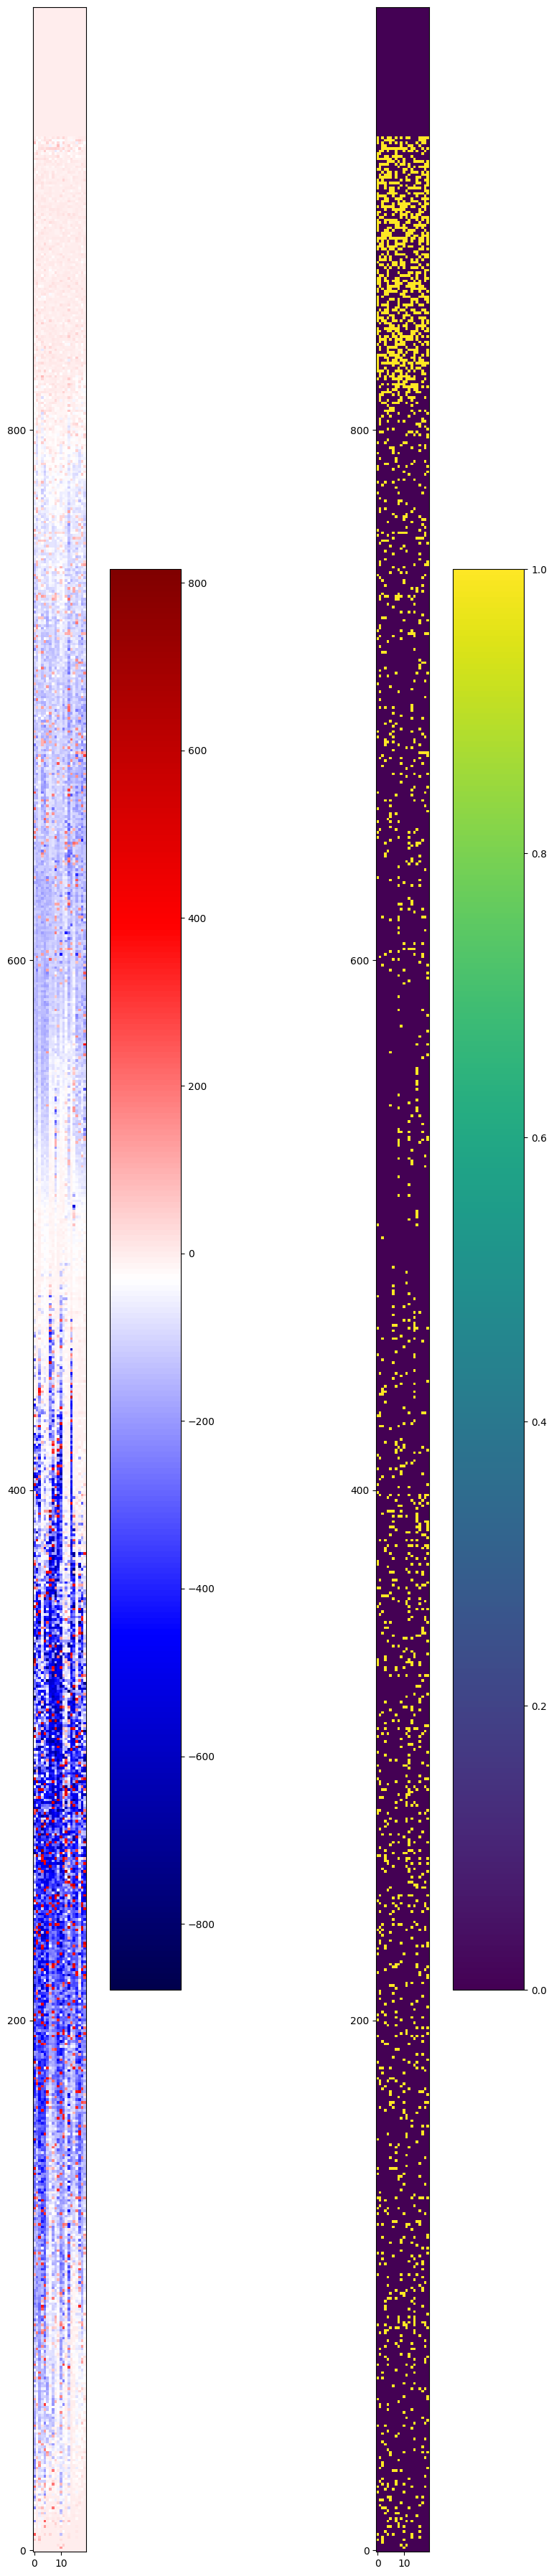

In [53]:
index = 400
with open(f"des_action_value_functions2/action_value_function_a_{index}.json") as json_file:
  value_function = json.load(json_file)

height = 20

value_function_values = get_value_function_values(height, value_function)
policy_values = get_policy_values(height, value_function)

fig = plt.figure()
fig.set_size_inches(12, 36)

ax1 = fig.add_subplot(121)
im1 = ax1.imshow(value_function_values, cmap=mpl.colormaps['seismic'] , origin="lower")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(policy_values, origin="lower")
fig.colorbar(im2)

fig.tight_layout()
plt.show()

In [26]:
def save_policy(value_function):
    policy = {}
    
    for state in value_function:
        if value_function[state]['0'] > value_function[state]['1']:
            policy[state] = '0'
        else:
            policy[state] = '1'
            
    print(state, type(state))
    with open(f"td_sarsa_functions2/policy.json", "w") as file:
        json.dump(policy, file)

index = 700
with open(f"des_action_value_functions3/action_value_function_a_{index}.json") as json_file:
  value_function = json.load(json_file)

save_policy(value_function)

(119, 89, 58) <class 'str'>
